# BANK HISTORICAL STOCK PRICES

Stock market has been the place in which buyers and sellers are aggregated for stocks also known as shares. In a stock market, ownership claims on businesses are exchanged in stocks or shares which include securities listed on a public stock exchange or traded privately through equity crowdfunding platforms. Trading stocks is a high risk adventure, therefore, stakeholders need trends and patterns to inform their decision. Investment in the stock market is most often done via stockbrokerages and electronic trading platforms and is usually done with an investment strategy in mind. The strategy borne out of data available to drive decision. The goal of this analysis, is to provide EDA, visualization and the performance of the best six (6) banks in the United States of America stock the period from 2006 to November 2020.

## DATA USED

The dataset used in this analysis is obtained from Kaggle specifically, https://www.kaggle.com/tomasmantero/banks-historical-stock-price. The data set contains the historical stock data of 99 banks and financial services.

The analysis will basically answers the following
1. What is the max Close price for each bank's stock throughout the time period?
2. On what date did Citigroup stock reach its highest price?
3. Is there a stock that stands out?
4. Did anything significant happen on 2009-01-20?
5. Which stock would you classify as the riskiest over the entire time period?
6. Which stock would be classified as the riskiest for the following period / year?
a. 2006
b. 2009
c. 2012
d. 2015
e. 2018
f. 2020
7. What is the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008?

The six banks whose historical stock data are been analysed are:
1. Bank of America (BAC)
2. CitiGroup (C)
3. Goldman Sachs (GS)
4. Wells Fargo (WFC)
5. JPMorgan Chase (JPM)
6. Morgan Stanley (MS)


The dataset has the following columns and their description:
1. High: The highest price at which a stock traded during the course of the trading day.
2. Low: The lowest price at which a stock traded during the course of the trading day.
3. Open: The price at which a stock started trading when the opening bell rang.
4. Close: The last price at which a stock trades during a regular trading session.
5. Volume: The number of shares that changed hands during a given day.
6. Adj Close: The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. Factors in corporate actions, such as stock splits, dividends, and rights offerings.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

To able to answer some of the questions above concerning time peiod, it is imperative to set the index of the DataFrame using the "Date" column for easy and meaningful datetime index slicing. Hence the parse_dates and index_col parameters of the read_csv method is activated for such purpose. 

In [2]:
# in case you cannot access the data from yahoo finance
bankAmerica = pd.read_csv('Data/BAC.csv',parse_dates=["Date"],index_col="Date")
citiGroup = pd.read_csv('Data/C.csv',parse_dates=["Date"],index_col="Date")
goldmanSachs = pd.read_csv('Data/GS.csv',parse_dates=["Date"],index_col="Date")
jpmorganChase = pd.read_csv('Data/JPM.csv',parse_dates=["Date"],index_col="Date")
morganStanley = pd.read_csv('Data/MS.csv',parse_dates=["Date"],index_col="Date")
wellsFargo = pd.read_csv('Data/WFC.csv',parse_dates=["Date"],index_col="Date")
citiGroup.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,379.511047
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,372.504486
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,374.352448
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,374.352448
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,372.581421


In [3]:
banks = ["Bank_of_America","CitiGroup","Goldman_Sachs","JPMorgan_Chase","Morgan_Stanley","Wells_Fargo"]


There is the need to concatenate all the six banks into one dataframe going forward with the analysis. 

In [4]:
stocking_banks= [bankAmerica,citiGroup,goldmanSachs,jpmorganChase,morganStanley,wellsFargo]
all_bank_stock = pd.concat(stocking_banks,axis=1,keys=banks)
all_bank_stock.head()

Bank_of_America                                               \
                      High        Low       Open      Close      Volume   
Date                                                                      
2006-01-03       47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04       47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05       46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06       46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09       46.970001  46.360001  46.720001  46.599998  15619400.0   

                        CitiGroup                                      ...  \
            Adj Close        High         Low        Open       Close  ...   
Date                                                                   ...   
2006-01-03  34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04  34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05  34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06  34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09  34.456806  487.399994  483.000000  486.000000  483.899994  ...   

           Morgan_Stanley                                  Wells_Fargo  \
                     Open      Close     Volume  Adj Close        High   
Date                                                                     
2006-01-03      57.169998  58.310001  5377000.0  36.867344   31.975000   
2006-01-04      58.700001  58.349998  7977800.0  36.892612   31.820000   
2006-01-05      58.549999  58.509998  5778000.0  36.993786   31.555000   
2006-01-06      58.770000  58.570000  6889800.0  37.031731   31.775000   
2006-01-09      58.630001  59.189999  4144500.0  37.423725   31.825001   

                                                                    
                  Low       Open      Close      Volume  Adj Close  
Date                                                                
2006-01-03  31.195000  31.600000  31.900000  11016400.0  20.723480  
2006-01-04  31.365000  31.799999  31.530001  10870000.0  20.483118  
2006-01-05  31.309999  31.500000  31.495001  10158000.0  20.460379  
2006-01-06  31.385000  31.580000  31.680000   8403800.0  20.580564  
2006-01-09  31.555000  31.674999  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

Provide names for the column levels for readability.

In [5]:
all_bank_stock.columns.names = ["Bank_name","Stock_info"]
all_bank_stock.head()

Bank_name  Bank_of_America                                               \
Stock_info            High        Low       Open      Close      Volume   
Date                                                                      
2006-01-03       47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04       47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05       46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06       46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09       46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank_name               CitiGroup                                      ...  \
Stock_info  Adj Close        High         Low        Open       Close  ...   
Date                                                                   ...   
2006-01-03  34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04  34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05  34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06  34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09  34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank_name  Morgan_Stanley                                  Wells_Fargo  \
Stock_info           Open      Close     Volume  Adj Close        High   
Date                                                                     
2006-01-03      57.169998  58.310001  5377000.0  36.867344   31.975000   
2006-01-04      58.700001  58.349998  7977800.0  36.892612   31.820000   
2006-01-05      58.549999  58.509998  5778000.0  36.993786   31.555000   
2006-01-06      58.770000  58.570000  6889800.0  37.031731   31.775000   
2006-01-09      58.630001  59.189999  4144500.0  37.423725   31.825001   

Bank_name                                                           
Stock_info        Low       Open      Close      Volume  Adj Close  
Date                                                                
2006-01-03  31.195000  31.600000  31.900000  11016400.0  20.723480  
2006-01-04  31.365000  31.799999  31.530001  10870000.0  20.483118  
2006-01-05  31.309999  31.500000  31.495001  10158000.0  20.460379  
2006-01-06  31.385000  31.580000  31.680000   8403800.0  20.580564  
2006-01-09  31.555000  31.674999  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

### EXPLORATORY DATA ANALYSIS

Let's analyse the dataset to get the summaries of main characteristics. This analysis will help unveil some relevant information necessary for the analysis. 

Since concatenate all the DataFrames together and set column levels for readability, there hierarchical/multilevel indexing, therefore, data extraction and slicing will be done in this regard. 

#### 1. What is the max close price for each bank's stock throughout the time period?

In [6]:
all_bank_stock.xs("Close",axis=1,level="Stock_info").max()

Bank_name
Bank_of_America     54.900002
CitiGroup          564.099976
Goldman_Sachs      273.380005
JPMorgan_Chase     141.089996
Morgan_Stanley      89.300003
Wells_Fargo         65.930000
dtype: float64

CitiGroup had the maximum closing price of 546.099976 followed by Goldman Sachs with 273.380005 with Bank of America having the least closing price of 54.900002 for the period under review.

In [7]:
def return_max_closing_date(dataframe,bank):
    max_close_date_ = dataframe["Close"].idxmax()
    message = "The date on which the {} had the maximum closing price is {} {} {}".\
      format(bank,max_close_date_.day,max_close_date_.month_name(),max_close_date_.year)
    print(message)
return_max_closing_date(bankAmerica,"Bank of America")
return_max_closing_date(citiGroup,"Citi Group")
return_max_closing_date(goldmanSachs,"Goldman Sachs")
return_max_closing_date(jpmorganChase,"JPMorgan Chase")
return_max_closing_date(morganStanley,"Morgan Stanley")
return_max_closing_date(wellsFargo,"Wells Fargo")

The date on which the Bank of America had the maximum closing price is 16 November 2006
The date on which the Citi Group had the maximum closing price is 27 December 2006
The date on which the Goldman Sachs had the maximum closing price is 12 March 2018
The date on which the JPMorgan Chase had the maximum closing price is 2 January 2020
The date on which the Morgan Stanley had the maximum closing price is 14 June 2007
The date on which the Wells Fargo had the maximum closing price is 26 January 2018


The decision to invest in any stock market as earlier said depends on the available information. For instance, if I want to invest in bank stock today I have to compare their closing stock price for the two days before to give me a clear idea of their performance. Therefore, we will compute the percentage change for each day and the previous day, which is also known as return. It is defined as:

Formula



In [8]:
returns_on_bank = pd.DataFrame()
for bank in banks:
    returns_on_bank[bank+' Returns'] = all_bank_stock[bank]["Close"].pct_change()
returns_on_bank.head()

,Bank_of_America Returns,CitiGroup Returns,Goldman_Sachs Returns,JPMorgan_Chase Returns,Morgan_Stanley Returns,Wells_Fargo Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Since the first row (2006-01-03) do not have a preceding day before it, .pct_change computation had produce NaN for this date. Below is the DataFrame without this particular row.

In [9]:
returns_on_bank=returns_on_bank[1:]
returns_on_bank.head()

,Bank_of_America Returns,CitiGroup Returns,Goldman_Sachs Returns,JPMorgan_Chase Returns,Morgan_Stanley Returns,Wells_Fargo Returns
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789


Pairplot of the returns_on_banks is show below.

In [10]:
for col in returns_on_bank.columns:
    print (col)

Bank_of_America Returns
CitiGroup Returns
Goldman_Sachs Returns
JPMorgan_Chase Returns
Morgan_Stanley Returns
Wells_Fargo Returns


<Figure size 864x720 with 0 Axes>

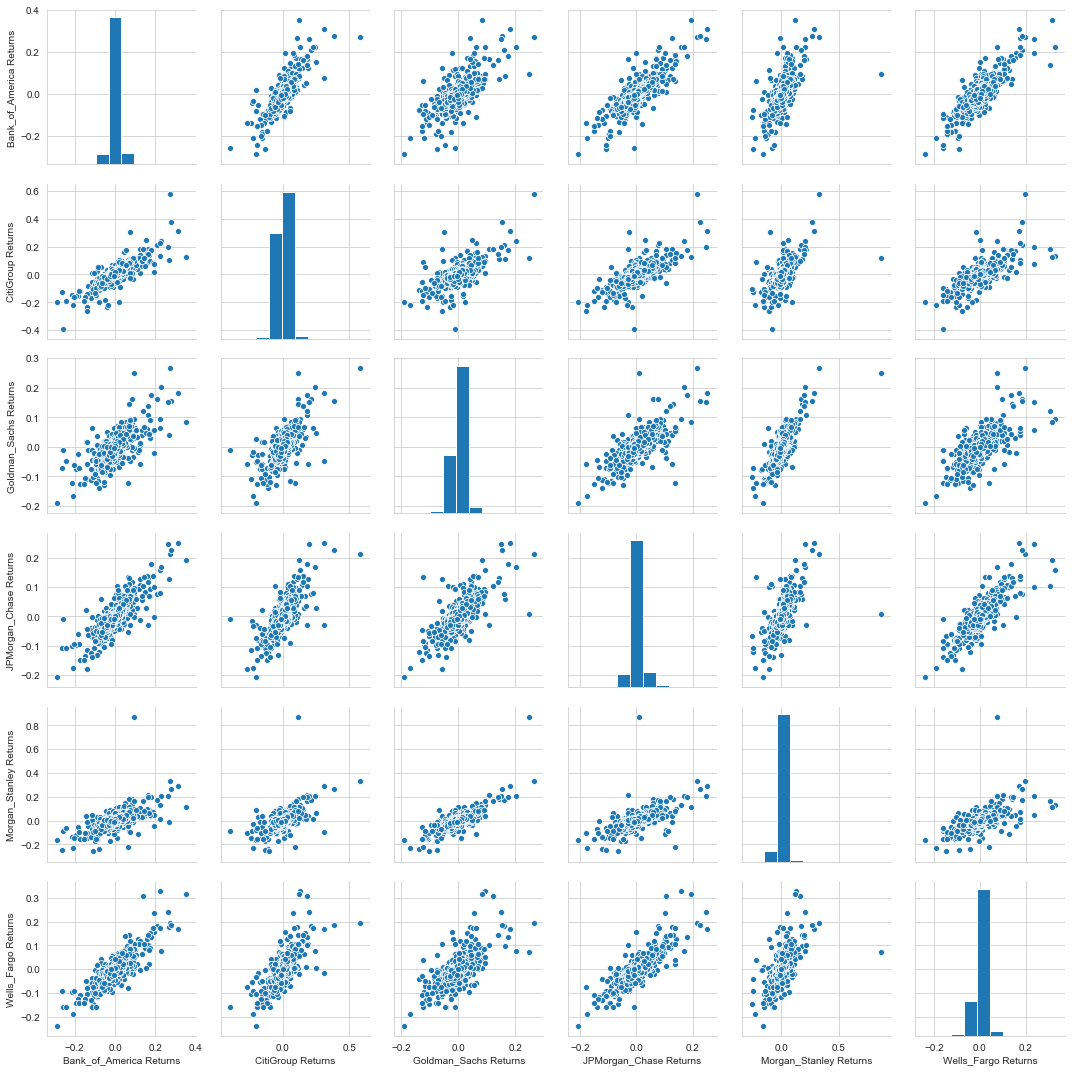

In [11]:
plt.figure(figsize=(12,10))
sns.pairplot(returns_on_bank[1:])
plt.savefig("pairplot.jpg")

In [12]:
returns_on_bank.idxmin()

Bank_of_America Returns   2009-01-20
CitiGroup Returns         2009-02-27
Goldman_Sachs Returns     2009-01-20
JPMorgan_Chase Returns    2009-01-20
Morgan_Stanley Returns    2008-10-09
Wells_Fargo Returns       2009-01-20
dtype: datetime64[ns]

From the above, it is evident that most of the banks recorded the lowest return on their stock on January 20 2009 which was the day the then President elect Barack Obama was inaugurated in the United States, which may accounts for the reduction in returns of some of the banks O(i.e. Bank of America, Goldman Sachs, JPMorgan Stanley and Wells Fargo. However, Morgan Stanley and CitiGroup had their worst returns on October 9 2008 and February 27 2009, some one month after that of the four banks.

In [13]:
returns_on_bank.idxmax()

Bank_of_America Returns   2009-04-09
CitiGroup Returns         2008-11-24
Goldman_Sachs Returns     2008-11-24
JPMorgan_Chase Returns    2009-01-21
Morgan_Stanley Returns    2008-10-13
Wells_Fargo Returns       2008-07-16
dtype: datetime64[ns]

But in terms of the day where each bank had their highest return, CitiGroup and Goldman Sachs had their highest returns on the same day, November 24 2009 and the rest happened on different days but, there is an interesting trend associated with the maximum returns received in a day. Out of the six four of the banks had their highest returns in the year 2008 and two occurring in 2009.

### BANK STOCK VOLATILITY MEASURE

The measure of how much data values within a group differ from the mean value is considered as the standard deviation. It is the statistical measure of market volatility, measuring how widely prices are dispersed from the average price. Standard deviation is a term used in statistics to measure the variance of a dataset from its mean value. Essentially, the further a value falls in relation to its mean, the greater the standard deviation. A low standard deviation indicates low volatility, thus the prices trade in a narrow trading range and vice versa.

Since volatility is a reflection of the degree to which price moves, a stock with a price that fluctuates wildly, hits new highs and lows, or moves erratically is considered highly volatile whiles a stock that maintains a relatively stable price has low volatility. Hence the knowledge of bank stock volatitlity is paramount in decision making. 

### Which stock would be classified as the riskiest over the entire period under review?

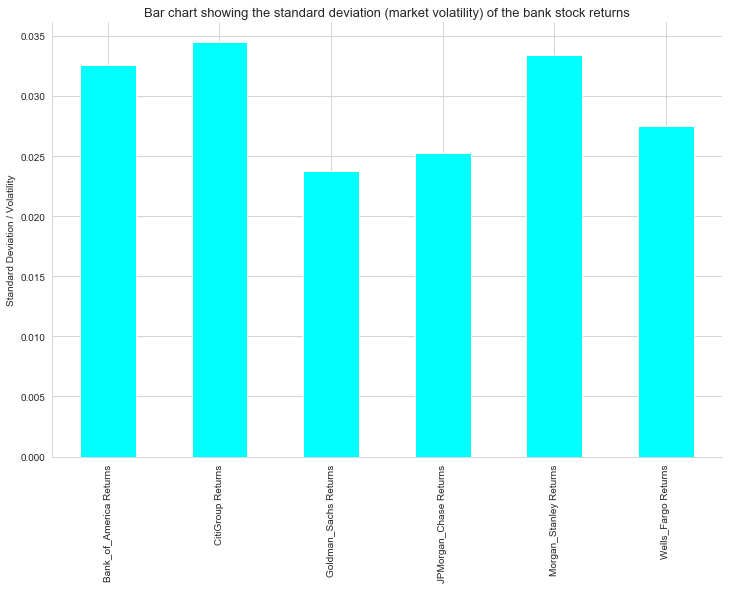

In [14]:
plt.figure(figsize=(12,8))
returns_on_bank.std().plot(kind="bar", color="aqua")
plt.ylabel("Standard Deviation / Volatility")
plt.title("Bar chart showing the standard deviation (market volatility) of the bank stock returns",fontsize=13)
sns.despine()
plt.savefig("std_all_banks.jpg")

As discussed earlier, a stock price fluctuates wildly with higher standard deviation hence the riskiest, higher volatility. CitiGroup returns is having 0.034467, standard deviation, therefore it is highly volatile and hence the riskiest.

In [15]:
def volatility_plot_per_period(from_period,to_period,color="aqua"):
    """Plot the volatility or standard deviation of the bank stock for a given period
       Arguments: 
           The starting period in the form 'year-month-day' e.g '0000-00-00' - from_period.
           The ending period in the form 'year-month-day' e.g '0000-00-00' - to_period.
       Return: 
           Nothing, but a bar chart of the standard deviations of the bank stock return for the given period.
    """
    plt.figure(figsize=(12,8))
    returns_on_bank.loc[from_period:to_period].std().plot(kind="bar",color=color)
    plt.ylabel("Standard Deviation / Volatility")
    plt.title("Bar chart showing the standard deviation (market volatility) of the bank stock returns for the period, {}".format(from_period.split("-")[0]),fontsize=13)
    plt.savefig(color+from_period.split("-")[0]+"std"+".jpg")
    plt.show()

### Which stock would be classified as the riskiest for the following period / year?
a. 2006
b. 2009
c. 2012
d. 2015
e. 2018
f. 2020

### a. 2006

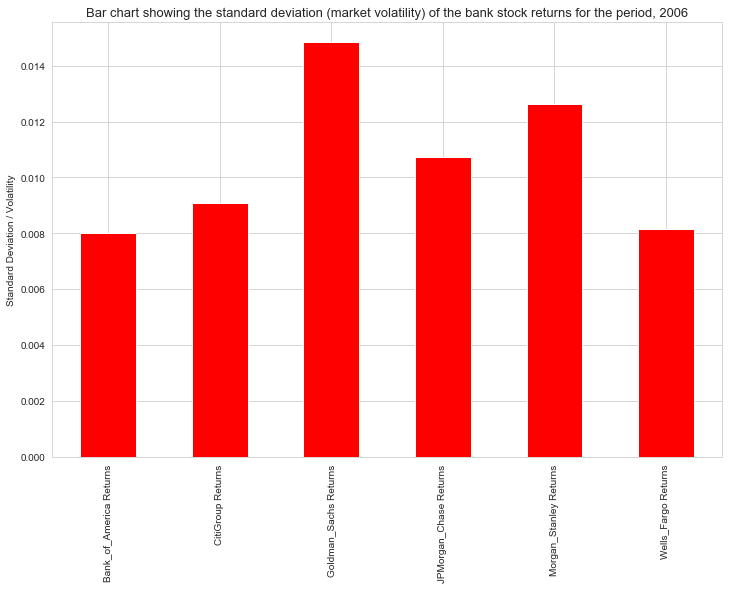

In [16]:
volatility_plot_per_period("2006-01-01","2006-12-31","red")

In [17]:
 returns_on_bank.loc["2006-01-01":"2006-12-31"].std()

Bank_of_America Returns    0.008008
CitiGroup Returns          0.009075
Goldman_Sachs Returns      0.014838
JPMorgan_Chase Returns     0.010738
Morgan_Stanley Returns     0.012648
Wells_Fargo Returns        0.008163
dtype: float64

From the graph, it seems Bank of America and Wells Fargo bank stock were the riskiest in 2006 with the volatility measure around 0.008 however, it is evident from the data that Bank of America was the riskiest with 0.008008 standard deviation.

### b. 2009

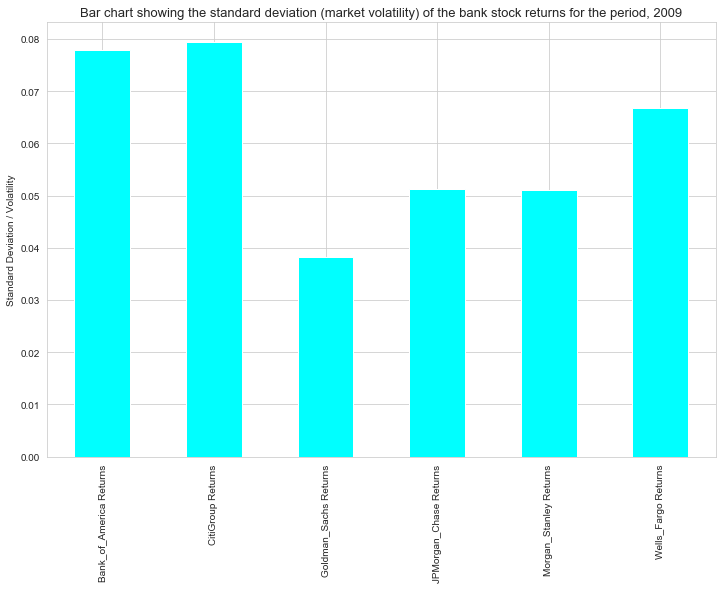

In [18]:
volatility_plot_per_period("2009-01-01","2009-12-31")

Goldman Sachs stock was the riskiest in 2009.

### c. 2012

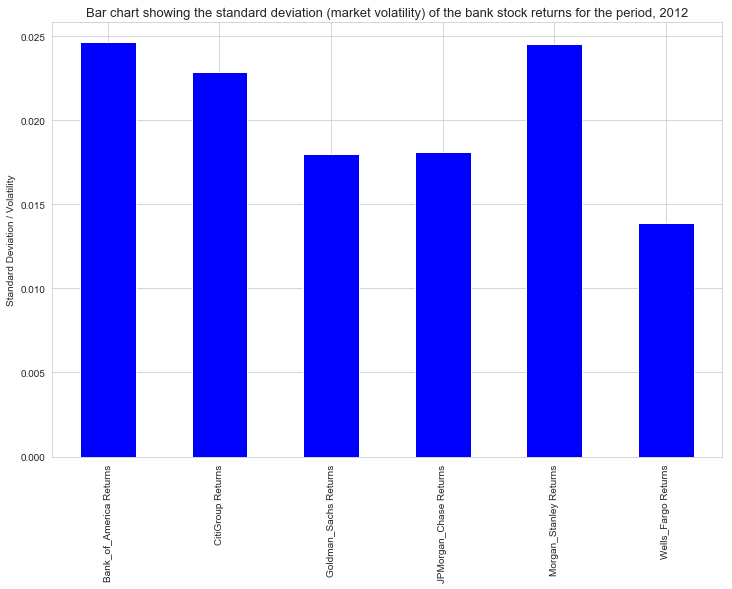

In [19]:
volatility_plot_per_period("2012-01-01","2012-12-31","blue")

From the above, Wells Fargo was the riskiest stock to invest in during the year 2012.

### d. 2015

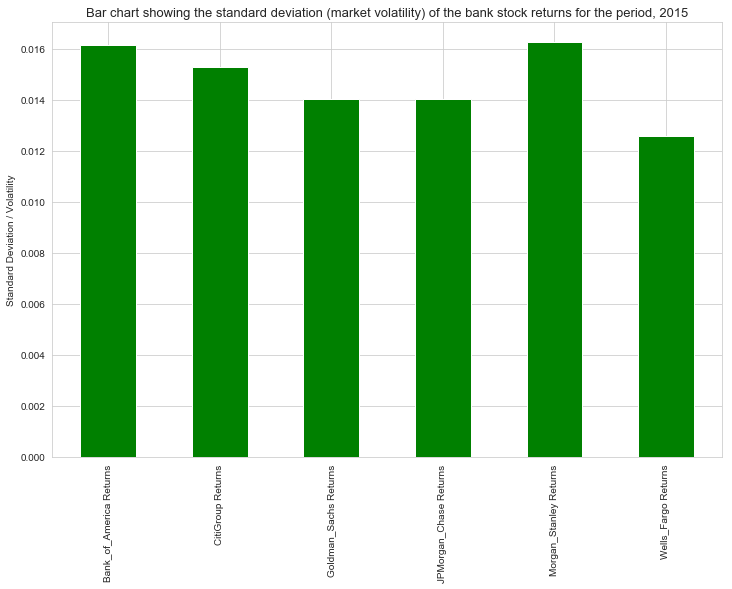

In [20]:
volatility_plot_per_period("2015-01-01","2015-12-31","green")

From the above, Wells Fargo was the riskiest stock to invest in during the year 2015

It is of important to make it known that for both 2012 and 2015 in our three-year range of the volatility measure analysis, Wells Fargo was the riskiest in both years.

### e. 2018

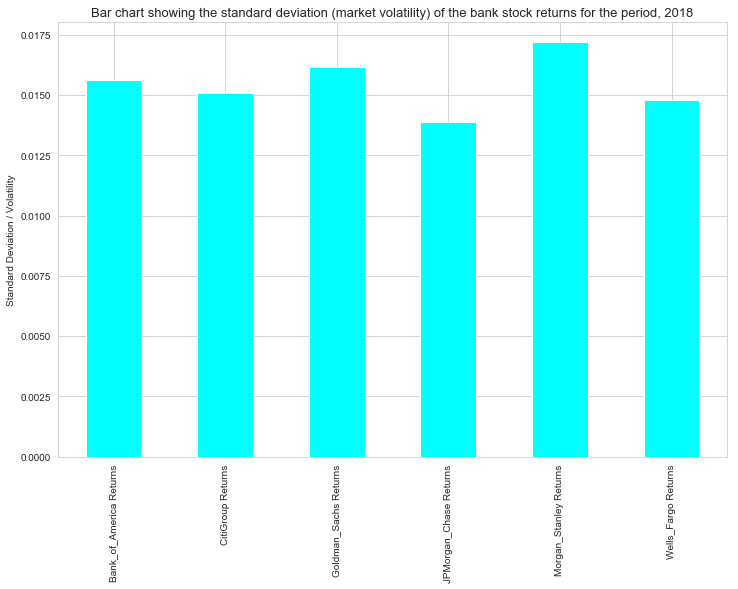

In [21]:
volatility_plot_per_period("2018-01-01","2018-12-31")

In the year 2018, JPMorgan Chase was the riskiest stock to invest in.

### f. 2020

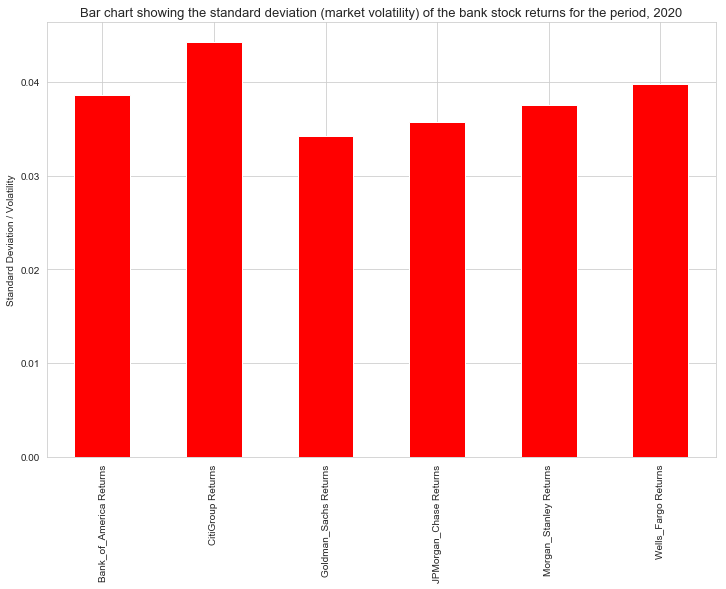

In [22]:
#For 2020 the full year stock information is not yet available therefore the period is from January 1 to November 20
volatility_plot_per_period("2020-01-01","2020-11-20","red")

From the above, Goldman Sachs was the riskiest stock to invest in during the year 2020 (i.e. from January to November, 2020).

From the above analysis of every three-year range thus 2006,2009, 2012, 2015, 2018 plus 2020, CitiGroup and Morgan Stanley did not featured in the riskiest stock to invest. However, Bank of America (2006) and JPMorgan Chase (2018) featured once, both GoldMan Sachs (2009 and 2020) and Wells Fargo (2012 and 2015) featured twice each.
Let's find out if really the two stocks, CitiGroup and Morgan Stanley are actually safer for investing in.

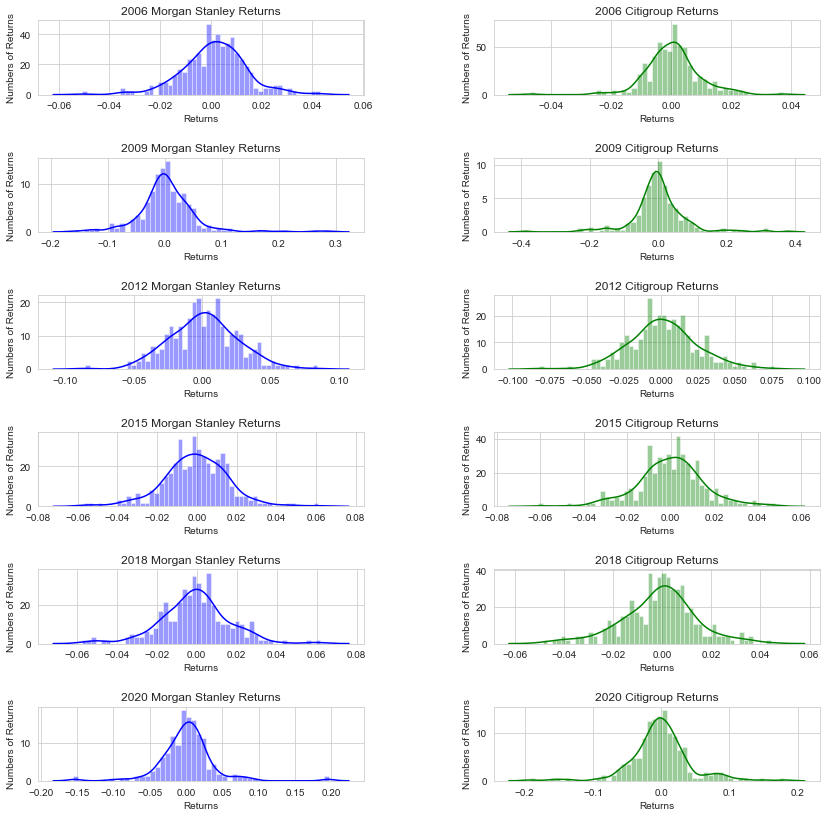

In [23]:
plt.figure(figsize=(14,12))
plt.subplot(6,2,1)
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.85, wspace=0.4)
sns.distplot(returns_on_bank.loc['2006-01-01':'2006-12-31']['Morgan_Stanley Returns'], color='blue', bins=50)
plt.title('2006 Morgan Stanley Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,2)
sns.distplot(returns_on_bank.loc['2006-01-01':'2006-12-31']['CitiGroup Returns'], color='green', bins=50)
plt.title('2006 Citigroup Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,3)
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.85, wspace=0.4)
sns.distplot(returns_on_bank.loc['2009-01-01':'2009-12-31']['Morgan_Stanley Returns'], color='blue', bins=50)
plt.title('2009 Morgan Stanley Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,4)
sns.distplot(returns_on_bank.loc['2009-01-01':'2009-12-31']['CitiGroup Returns'], color='green', bins=50)
plt.title('2009 Citigroup Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,5)
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.85, wspace=0.4)
sns.distplot(returns_on_bank.loc['2012-01-01':'2012-12-31']['Morgan_Stanley Returns'], color='blue', bins=50)
plt.title('2012 Morgan Stanley Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,6)
sns.distplot(returns_on_bank.loc['2012-01-01':'2012-12-31']['CitiGroup Returns'], color='green', bins=50)
plt.title('2012 Citigroup Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,7)
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.85, wspace=0.4)
sns.distplot(returns_on_bank.loc['2015-01-01':'2015-12-31']['Morgan_Stanley Returns'], color='blue', bins=50)
plt.title('2015 Morgan Stanley Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,8)
sns.distplot(returns_on_bank.loc['2015-01-01':'2015-12-31']['CitiGroup Returns'], color='green', bins=50)
plt.title('2015 Citigroup Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,9)
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.85, wspace=0.4)
sns.distplot(returns_on_bank.loc['2018-01-01':'2018-12-31']['Morgan_Stanley Returns'], color='blue', bins=50)
plt.title('2018 Morgan Stanley Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,10)
sns.distplot(returns_on_bank.loc['2018-01-01':'2018-12-31']['CitiGroup Returns'], color='green', bins=50)
plt.title('2018 Citigroup Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,11)
plt.subplots_adjust(top = 0.89, bottom=0.01, hspace=0.85, wspace=0.4)
sns.distplot(returns_on_bank.loc['2020-01-01':'2020-11-20']['Morgan_Stanley Returns'], color='blue', bins=50)
plt.title('2020 Morgan Stanley Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.subplot(6,2,12)
sns.distplot(returns_on_bank.loc['2020-01-01':'2020-11-20']['CitiGroup Returns'], color='green', bins=50)
plt.title('2020 Citigroup Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')
plt.savefig("citigroup_morganStanley.jpg")
plt.show()

Comparing the distribution plot of the two bank stocks, Moorgan Stanley's seem quite stable except 2009 where it was right skewed whiles CitiGroup's is more stretched out, specially in 2018.

Correlation shows the relationship between two variables. It is the measure of how variables relates and ranges between -1 and +1, where the sign depicts the direction of the line that reperesent the relationship slope. Negative for downward slope and positive for upward slope. Basically, the Pearson Correlation Coefficient has been the measure for this correlation. Below is the heatmap of the correlation of the bank stocks' closing price.

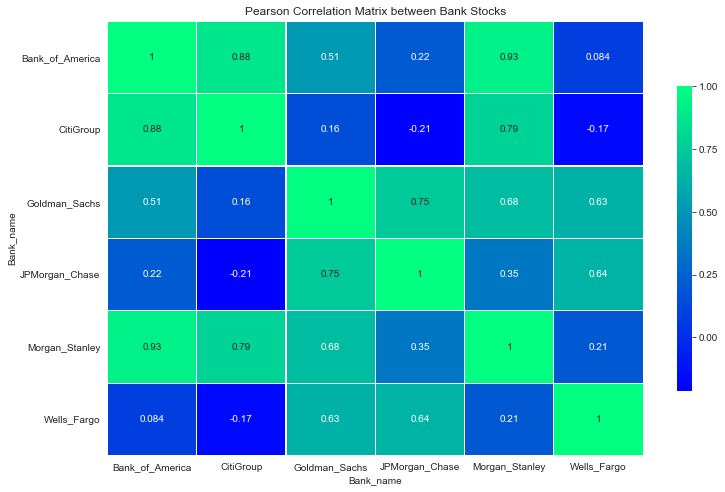

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(all_bank_stock.xs(key="Close", axis=1,\
                                                   level="Stock_info").corr(),cmap="winter",annot=True,\
           linewidths=0.25, linecolor="w",cbar_kws={"shrink":0.7})
plt.title("Pearson Correlation Matrix between Bank Stocks")
plt.savefig("heatmap_corr.jpg")
plt.show()

The bank stocks which correlates the most is between Bank of America and Morgan_Stanley, 0.93 followed by Bank of America and CitiGroup, 0.88 whiles the least positively correlation is between Goldman Sachs and Citigroup. However, the least negatively correlation is between CitiGroup and JPMorgan Chase, -0.21.

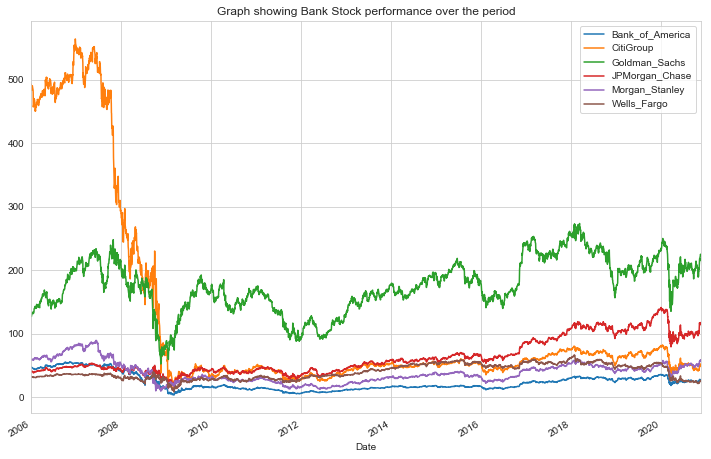

In [25]:
plt.figure(figsize=(12,8))
for bank in banks:
    all_bank_stock[bank]["Close"].plot(label=bank)
plt.legend()
plt.title("Graph showing Bank Stock performance over the period")
plt.savefig("recession_graph.jpg")
plt.show()

From the staring period the best performing bank was CitiGroup along with Goldamn Sachs however, the financial recession in 2008 coupled with the change in government in the US may be the cause for the crash of CitiGroup and Goldman Sachs had around 2008-2009, but Goldman Sachs bounces back quickly after the recession as shown in the figure above.

### MOVING AVERAGE

To identify trends and determine suppport as well as ressistance levels in a price data, a simple technical analysis tool called moving average is needed. Moving average smooths out price data in creating an updated average price constantly. It is taken over a specified period of time chosen by the business. Usually the average period used are 20 minutes, 10 days, 30 weeks and the likes.

### 7. What is the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008?

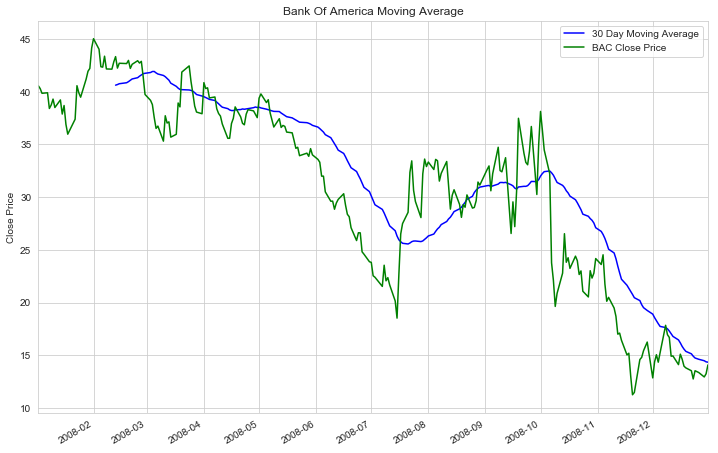

In [26]:
plt.figure(figsize=(12,8))
bankAmerica['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(color='blue', label='30 Day Moving Average')
bankAmerica['Close'].loc['2008-01-01':'2008-12-31'].plot(color='green', label='BAC Close Price')
plt.ylabel('Close Price')
plt.xlabel('')
plt.title('Bank Of America Moving Average')
plt.savefig("moving_avg.jpg")
plt.legend()

The 30 days moving average of Bank of America started with 40.621667 from February and continued to increase in March. After March, falls steadily until mid July where it reached its minimum and started to increase again. The second rise reached its maximum in the first week of October and started to decline again reachig its minimum for the year at 14.341000.